**IUT d'Orléans - Année 2020-2021- 1A\
M2201 Graphes et Langages**

# TP4: Applications du parcours en profondeur

Nous allons utilisé le parcours en profondeur pour résoudre différents problèmes. Voici une version de cet algorithme, qui pourra être utilisé pour résoudre les exercices qui vont suivre. Pensez à exécuter la cellule!

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_init(G,u):
    for v in G.nodes:
        G.nodes[v]["color"] = "white"
        G.nodes[v]["father"] = None
    for u, v in G.edges:
        G.edges[u,v]["color"] = "black"

def mark_as_visited(G,v,w):
    G.nodes[w]["color"] = "red"
    G.nodes[w]["father"] = v
    
def tree_edge(G,v,w):
    G.edges[v,w]["color"] = "green"
    
def mark_as_treated(G,v):   
    G.nodes[v]["color"] = "green"
    
def find_uncolored_neigh(G,u):
    neigh = None
    for w in G.adj[u]:
        if G.nodes[w]["color"] == "white":
            neigh = w
    return neigh

def DFS(G,u):
    """
    Implémentation de l'algorithme du parcours en profondeur (DFS) en utilisant une pile.
    
    Paramètres:
    G -- le graphe que l'on veut parcourir
    u -- le sommet de départ du parcours
    """
    
    # initialisation
    
    S = []
    S.append(u)
    graph_init(G,u)
    mark_as_visited(G,None,u)
    
    # boucle principale
    while len(S) > 0:
        v = S[-1]
        w = find_uncolored_neigh(G,v) # on recherche un voisin non visité
        if w != None:
            mark_as_visited(G,v,w)
            tree_edge(G,v,w)
            S.append(w)
        else:
            mark_as_treated(G,v)
            S.pop()

## Détection de cycles

Nous allons proposer une solution permettant de **détecter la présence d'un cycle dans un graphe**. Pouvoir répondre à cette question nous permet d'en apprendre beaucoup sur la nature du graphe. Par exemple, si un graphe est connexe et acyclique, alors c'est un *arbre*. Si un graphe ne possède pas de cycle impair, on peut en déduire que c'est un graphe *biparti*, c'est-à-dire que ses sommets peuvent être diviser en deux sous-ensemble de sommets tel que deux sommets d'un même sous-ensemble ne sont pas voisins. De nombreux problèmes peuvent être résolus de manière plus efficace ou bien avec des solutions plus simples si le graphe appartient à une de ces familles.

1. Proposez un algorithme qui renvoie un chemin (représenté par une liste de sommets) entre deux sommets $u$ et $v$. On supposera qu'un parcours en profondeur a été réalisé depuis un sommet quelconque $r$.

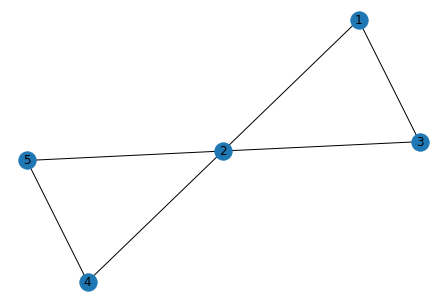

In [11]:
def chemin(G,u,v):
    chemin = []
    sommet_courant = u
    while sommet_courant != None and sommet_courant != v:
        chemin.append(sommet_courant)
        sommet_courant = G.nodes[sommet_courant]["father"]
    if sommet_courant == v:
        chemin.append(v)
    else:
        chemin_rv = []
        sommet_courant = v
        while G.nodes[sommet_courant]["father"] != None:
            chemin_rv.insert(0,sommet_courant)
            sommet_courant = G.nodes[sommet_courant]["father"]
        chemin.extend(chemin_rv)
    return chemin

G=nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(4,5)

nx.draw(G, with_labels=True)

2. Proposez un algorithme qui permet de vérifier si un graphe possède un cycle et renvoie le premier cycle détecté (représenté par une liste de sommets) et None sinon.

In [ ]:
def graphe_cycle(G,u):
    S = []
    S.append(u)
    graph_init(G,u)
    mark_as_visited(G,None,u)
    
    while len(G)>0:
        v=S[-1]
        
        for a in G.adj

3. Modifiez l'algorithme précédent afin de permet de tester si un graphe possède un cycle de longueur impair.

## Tour de garde

Un chateau fort est composé de plusieurs tourelles, reliées entre entre elles par des murailles. Le capitaine de la garde souhaite mettre en place des rondes de surveillance le long des murailles. Malheureusement, la grande fête de la cité a eu lieu la veille et bon nombre de ses soldats sont "indisposés" ce matin... Le capitaine cherche donc une solution pour au moins garantir que les tourelles, points stratégiques, seront régulièrement surveillées par les rondes. Pour cela, il doit donc trouver l'ensemble minimum de murailles sur lesquelles placer ces soldats afin de surveiller toutes les tourelles.

1. Proposez tout d'abord une solution très simple, mais pas optimale, permettant de surveiller les tourelles.

2. Proposez une amélioration de cette solution permettant de minimiser le nombre de murailles avec des soldats, si les murailles encerclent la ville.

3. En supposant qu'il y ait $n$ tourelles à surveiller, que pouvez-vous dire du nombre de murailles où nous devons placer des soldats?

4. Réfléchissez à des solutions (pas forcément optimales) permettant de résoudre notre problème de surveillance en supposant que les tourelles sont reliées entre elles de manière arbitraire.